In [1]:
import pandas as pd
import string
import numpy as np
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import copy
import requests as r
%matplotlib inline

string_punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~‘êàé—’”“'

In [2]:
# Pride and Prejudice by Jane Austen (https://dev.gutenberg.org/ebooks/1342)
url = 'https://dev.gutenberg.org/files/1342/1342-0.txt'
data = r.get(url)
f = data.text
remove_bom = f.replace('\ufeff', '###')
comma_delimit = remove_bom.replace('\n', ',').strip().lower().replace('\r', '').split(',') 
clean_text = [each for each in comma_delimit if (str.rstrip(each) != '') or (str.rstrip(each) not in string_punctuation)]
df = pd.DataFrame({'text': clean_text})

In [3]:
def clean(s):
    '''
    Remove punctuation, numeric values and all extra spaces from string. 
    '''
    # remove punctuation
    no_punc = s.translate(str.maketrans('', '', string_punctuation))
    # remove num
    no_num = ''.join([each for each in no_punc if not each.isdigit()])
    # remove extra spaces
    return ' '.join(no_num.split())

def count_alpha(x):
    return Counter(x)

In [4]:
df_clean = copy.deepcopy(df)
df_clean.loc[:, 'clean_string'] = df_clean['text'].apply(clean)
df_clean.replace('', np.nan, inplace=True)
df_clean.describe()

,text,clean_string
count,20805,20782
unique,18817,18197
top,and,and
freq,177,191


In [5]:
df_clean = df_clean[~df_clean['clean_string'].isna()]
df_clean.describe()

,text,clean_string
count,20782,20782
unique,18810,18197
top,and,and
freq,177,191


In [6]:
df_clean.loc[:, 'clean_string_count'] = df_clean['clean_string'].apply(count_alpha)
list_dict = [dict(each) for each in df_clean.clean_string_count.tolist()]

In [7]:
final_dist = {}
for d in list_dict:
    for k in d.keys():
        final_dist[k] = final_dist.get(k, 0) + d[k]

In [8]:
df_freq = pd.DataFrame(final_dist.items(), columns=['letter', 'count'])
df_freq['freq'] = df_freq['count'] / df_freq['count'].sum()
df_freq.at[3, 'letter'] = 'space'

In [9]:
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.reset_index(drop=True)

,letter,count,freq
0,space,103750,0.158162
1,e,71265,0.108640
2,t,48229,0.073523
3,a,42759,0.065184
4,o,41385,0.063089
5,i,38958,0.059390
6,n,38730,0.059042
7,h,34650,0.052822
8,s,33873,0.051638
9,r,33537,0.051126


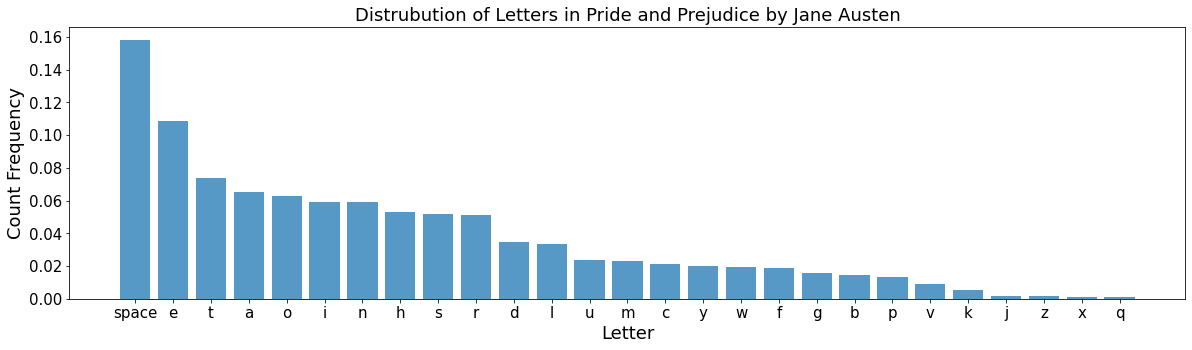

In [14]:
plt.figure(figsize=(20, 5))
plt.bar(df_freq['letter'].tolist(), df_freq['freq'].tolist(), alpha=0.75)
#plt.ylim(0, 10000, 2000)
plt.ylabel('Count Frequency', fontsize=18)
plt.xlabel('Letter', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distrubution of Letters in Pride and Prejudice by Jane Austen', fontsize=18)
plt.show()